In [1]:
# -*- coding: utf-8 -*
%matplotlib inline
import itchat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

itchat.auto_login()

Getting uuid of QR code.
Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as benson


In [2]:
friends = itchat.get_friends(update = True)[0:]

In [3]:
print friends[3]

{u'UserName': u'@f1282815b255dd9731a3e62f81ad733969a3c9577919a88ae3d4b1d6284ac1b2', u'City': u'\u5e7f\u5dde', u'DisplayName': u'', u'UniFriend': 0, 'MemberList': <ContactList: []>, u'PYQuanPin': u'heimanba', u'RemarkPYInitial': u'LHL', u'Uin': 0, u'AppAccountFlag': 0, u'VerifyFlag': 0, u'Province': u'\u5e7f\u4e1c', u'KeyWord': u'', u'RemarkName': u'\u6797\u6d77\u91cf', u'PYInitial': u'HMB', u'ChatRoomId': 0, u'IsOwner': 0, u'HideInputBarFlag': 0, u'EncryChatRoomId': u'', u'AttrStatus': 102821, u'SnsFlag': 17, u'MemberCount': 0, u'OwnerUin': 0, u'Alias': u'', u'Signature': u'\u6267\u884c\u529b\u53ea\u8bb2\u7ed3\u679c\uff0c\u4e0d\u8bb2\u5982\u679c', u'ContactFlag': 3, u'NickName': u'\u9ed1\u66fc\u5df4', u'RemarkPYQuanPin': u'linhailiang', u'HeadImgUrl': u'/cgi-bin/mmwebwx-bin/webwxgeticon?seq=646053107&username=@f1282815b255dd9731a3e62f81ad733969a3c9577919a88ae3d4b1d6284ac1b2&skey=@crypt_84397a18_4a25d8ef9f48f639c50a5bf41db07c51', u'Sex': 1, u'StarFriend': 0, u'Statues': 0}


In [4]:
male = female = other = 0
for i in friends[1:]:
    sex = i["Sex"]
    if sex == 1:
        male += 1
    elif sex == 2:
        female += 1
    else:
        other += 1
        # 总数算上，好计算比例啊～
        total = len(friends[1:])
        # 好了，打印结果

print (u"男性好友：%.2f%%" % (float(male) / total * 100))
print (u"女性好友：%.2f%%" % (float(female) / total * 100))
print (u"其他：%.2f%%" % (float(other) / total * 100))

男性好友：58.18%
女性好友：38.36%
其他：3.45%


In [5]:
def get_var(var):
    variable = []
    for i in friends:
        value = i[var]
        variable.append(value)
    return variable

In [6]:
nickName = get_var('NickName')
sex = get_var("Sex")
province = get_var('Province')
city = get_var('City')
signature = get_var("Signature")

In [7]:
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [8]:
data = {
   "nickName" : nickName,
    "sex" : sex,
    "province" : province,
    "city" : city,
    "signature" : signature
}
df = pd.DataFrame(data)
df.to_csv("data_lee.csv", index = True, encoding="utf_8_sig")

In [9]:
from echarts import Echart, Legend, Pie
chart = Echart(u'%s 的微信好友性别比例:'% (friends[0]['NickName']), "From Wechat")
chart.use(Pie('WeChat',
              [{'value': male, 'name': u'男性 %.2f%%' % (float(male) / total * 100)},
               {'value': female, 'name': u'女性 %.2f%%' % (float(female) / total * 100)},
               {'value': other, 'name': u'其他 %.2f%%' % (float(other) / total * 100)}],
              radius=["50%", "70%"]))
chart.use(Legend(['Male',"Female","Other"]))
del chart.json['xAxis']
del chart.json["yAxis"]
chart.plot()
chart.save("..","Pie chart")

In [10]:
import re
siglist = []
for i in friends:
    sig = i['Signature'].strip().replace('span','').replace('class','').replace('emoji','')
#     Regular expression do not allow space in the compile function
    rep = re.compile("1f\d+\w*|[<>=/]")
    sig = re.sub(rep,"", sig)
    siglist.append(sig)
text = "".join(siglist)
print siglist

In [11]:
import jieba
wordlist = jieba.cut(text,cut_all=True)
word_space_split = " ".join(wordlist)
# Store the signature of all friends in data.txt
f = open('data_lee.txt', "w+")
f.write(word_space_split)
f.close()

In [12]:
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image as image
coloring = np.array(image.open("D:/Wallpaper/bg.jpg"))
mywordCloud = WordCloud(background_color="white",
                       max_words = 2000,
#                     mask = coloring,
                       max_font_size = 60,
                       random_state = 42,
                       scale = 2,
                        font_path = "LiheiPro.ttf"
                       ).generate(word_space_split)

(-0.5, 799.5, 399.5, -0.5)

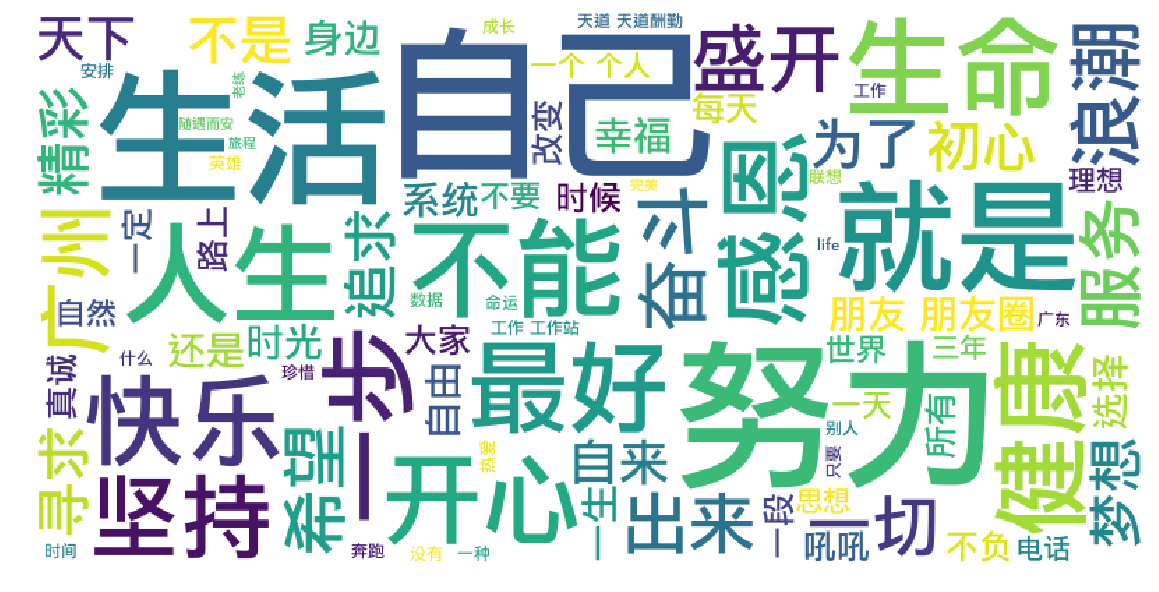

In [13]:
imageColors = ImageColorGenerator(coloring)
plt.figure(figsize=(20,20))
# plt.imshow(mywordCloud.recolor(color_func=imageColors))
plt.imshow(mywordCloud)
# plt.xlim([0,500])
# plt.ylim([0,500])
plt.axis("off")

In [14]:
import os
mywordCloud.to_file(os.path.join("cloud.png"))